In [ ]:
%pip install Sastrawi

In [2]:
# Standard library for data sciene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for text processing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
# Library for NLP
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Library for basic machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
# Library for deep learning
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from gensim.corpora.dictionary import Dictionary
import multiprocessing

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
# load dataset into pandas
import pandas as pd
data = pd.read_csv('preprocessed_gojek.csv')
data

,userName,content,score,at,appVersion,sentiment,casefolded_content,cleaned_content,normalization_content,final_text,tokenize_content,stopwords_content,stem_content,finalpreprocess
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,Negatif,akun gopay saya di blok,akun gopay saya di blok,akun gopay saya di blok,akun gopay saya blok,"['akun', 'gopay', 'saya', 'blok']","['akun', 'gopay', 'blok']","['akun', 'gopay', 'blok']","['akun', 'gopay', 'blok']"
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3,Netral,Lambat sekali sekarang ini bosssku apk gojek g...,lambat sekali sekarang ini bosssku apk gojek g...,lambat sekali sekarang ini bosku aplikasi goje...,lambat sekali sekarang bosku aplikasi gojek t...,"['lambat', 'sekali', 'sekarang', 'bosku', 'apl...","['lambat', 'bosku', 'aplikasi', 'gojek', 'kaya']","['lambat', 'bosku', 'aplikasi', 'gojek', 'kaya']","['lambat', 'bosku', 'aplikasi', 'gojek', 'kaya']"
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3,Positif,Kenapa sih dari kemarin sy buka aplikasi gojek...,kenapa sih dari kemarin sy buka aplikasi gojek...,kenapa sih dari kemarin saya buka aplikasi goj...,kenapa dari kemarin saya buka aplikasi gojek ...,"['kenapa', 'dari', 'kemarin', 'saya', 'buka', ...","['kemarin', 'buka', 'aplikasi', 'gojek', 'kasi...","['kemarin', 'buka', 'aplikasi', 'gojek', 'kasi...","['kemarin', 'buka', 'aplikasi', 'gojek', 'kasi..."
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3,Negatif,Baru download gojek dan hape baru trus ditop u...,baru download gojek dan hape baru trus ditop u...,baru download gojek dan hape baru terus ditop ...,baru download gojek hape baru terus ditop go...,"['baru', 'download', 'gojek', 'hape', 'baru', ...","['download', 'gojek', 'hape', 'ditop', 'gopay'...","['download', 'gojek', 'hape', 'ditop', 'gopay'...","['download', 'gojek', 'hape', 'ditop', 'gopay'..."
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3,Positif,Mantap,mantap,mantap,mantap,['mantap'],['mantap'],['mantap'],['mantap']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0,Negatif,Gofood Biaya lain2ya gak ngotak mending hujan2...,gofood biaya lainya gak ngotak mending hujanan...,go-food biaya lainya tidak ngotak lebih baik h...,-food biaya lainya tidak ngotak lebih baik huj...,"['-food', 'biaya', 'lainya', 'tidak', 'ngotak'...","['-food', 'biaya', 'lainya', 'ngotak', 'hujana...","['-food', 'biaya', 'lainya', 'ngotak', 'hujana...","['-food', 'biaya', 'lainya', 'ngotak', 'hujana..."
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0,Positif,Yok lah,yok lah,yok lah,,[],[],[],[]
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0,Positif,Sempurna,sempurna,sempurna,sempurna,['sempurna'],['sempurna'],['sempurna'],['sempurna']
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0,Negatif,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,gojek lama lama gak jelas lagi pesen masa maps...,gojek lama lama tidak jelas lagi pesen masa ma...,gojek lama lama tidak jelas lagi pesen masa ma...,"['gojek', 'lama', 'lama', 'tidak', 'jelas', 'l...","['gojek', 'pesen', 'mapsnya', 'ilang', 'layar'...","['gojek', 'pesen', 'mapsnya', 'ilang', 'layar'...","['gojek', 'pesen', 'mapsnya', 'ilang', 'layar'..."


In [6]:
# Assuming your data is in a CSV file
file_path = 'preprocessed_gojek.csv'
df = pd.read_csv(file_path)

# Assuming the 'Text Tweet' column contains the text data and 'Sentiment' contains labels
texts = df['finalpreprocess'].values
labels = df['score'].values

In [7]:
texts[0]

"['akun', 'gopay', 'blok']"

TOKENAIZING, LABELING, PADDING

In [43]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Membaca dataset yang telah dipreproses
data = pd.read_csv('preprocessed_gojek.csv')

# Memeriksa apakah ada nilai kosong di dataset dan menghapusnya jika ada
data = data.dropna(subset=['finalpreprocess', 'score'])

# Menampilkan beberapa baris pertama untuk verifikasi
print(data.head())

# Memisahkan teks dan label
texts = data['finalpreprocess'].values
labels = data['score'].values  # Pastikan kolom 'score' berisi label yang benar

# Membuat dan melatih tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Mengubah teks menjadi sequences
sequences = tokenizer.texts_to_sequences(texts)

# Menampilkan beberapa sequences untuk verifikasi
print(sequences[:5])

# Menentukan panjang maksimum sequence (optional, bisa disesuaikan)
max_sequence_length = 10  # Misalnya, 100 kata untuk panjang maksimal

# Padding sequences agar panjangnya seragam
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
padded_sequences = np.reshape(padded_sequences, (padded_sequences.shape[0], 1, max_sequence_length))

# Mengonversi label menjadi integer
le = LabelEncoder()
Y = le.fit_transform(labels)

# Menampilkan bentuk data setelah padding dan encoding
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Menampilkan beberapa label yang ter-encode
print("Encoded labels:", Y[:5])

                  userName                                            content  \
0                Yuga Edit                            akun gopay saya di blok   
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion sentiment  \
0      1  2022-01-21 10:52:12      4.9.3   Negatif   
1      3  2021-11-30 15:40:38      4.9.3    Netral   
2      4  2021-11-29 22:58:12      4.9.3   Positif   
3      1  2022-09-03 15:21:17      4.9.3   Negatif   
4      5  2022-01-15 10:05:27      4.9.3   Positif   

                                  casefolded_content  \
0                            akun gopay saya di blok   
1  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Kenapa sih dari k

In [44]:
sequence_lengths = [len(x) for x in sequences]
print("Max sequence length: ", max(sequence_lengths))
print("Min sequence length: ", min(sequence_lengths))

Max sequence length:  55
Min sequence length:  0


In [45]:
print("Shape of padded_sequences:", padded_sequences.shape)

Shape of padded_sequences: (225002, 1, 10)


SPLIT DATA

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal data X dan Y
X = np.random.rand(1000, 10)  # 1000 sampel, 10 fitur
Y = np.random.randint(2, size=1000)  # Label biner, misal 0 atau 1

# Pembagian data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape data untuk LSTM: (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

TRAINING WORD2VEC

In [48]:
from sklearn.model_selection import train_test_split

# Definisikan TRAIN_SIZE sesuai keinginan (misalnya 0.8 untuk 80% pelatihan dan 20% pengujian)
TRAIN_SIZE = 0.8

# Pembagian data menjadi df_train dan df_test
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)

# Menampilkan ukuran data pelatihan dan pengujian
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 180001
TEST size: 45001


WORD2VEC

In [49]:
import time

start_time = time.time()

# Simulasi kode yang ingin diukur waktunya
time.sleep(4.5)  # Simulasi proses yang memakan waktu

end_time = time.time()
elapsed_time = end_time - start_time

print(f"CPU times: user {elapsed_time:.2f} s, sys: 0 ms, total: {elapsed_time:.2f} s")
print(f"Wall time: {elapsed_time:.2f} s")

CPU times: user 4.50 s, sys: 0 ms, total: 4.50 s
Wall time: 4.50 s


In [50]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Pastikan Anda sudah mendownload 'punkt' untuk tokenisasi
nltk.download('punkt')

# Definisikan fungsi untuk tokenisasi
def tokenize_text(text):
    """Tokenize the text and convert it to lowercase."""
    # Pastikan 'text' adalah string sebelum diproses
    if isinstance(text, str):  # Cek apakah 'text' adalah string
        return word_tokenize(text.lower())  # Tokenize dan ubah ke lowercase
    else:
        return []  # Kembalikan list kosong jika bukan string

# Membaca dataset
df = pd.read_csv('preprocessed_gojek.csv')

# Pastikan tidak ada nilai NaN dalam kolom 'finalpreprocess', bisa dihapus atau diganti
df['finalpreprocess'] = df['finalpreprocess'].fillna('')  # Mengganti NaN dengan string kosong

# Terapkan fungsi tokenisasi pada kolom 'finalpreprocess'
df['tokenized_content'] = df['finalpreprocess'].apply(tokenize_text)

# Tampilkan hasil tokenisasi pada beberapa baris pertama untuk memverifikasi
print(df[['finalpreprocess', 'tokenized_content']].head())

[nltk_data] Downloading package punkt to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                     finalpreprocess  \
0                          ['akun', 'gopay', 'blok']   
1   ['lambat', 'bosku', 'aplikasi', 'gojek', 'kaya']   
2  ['kemarin', 'buka', 'aplikasi', 'gojek', 'kasi...   
3  ['download', 'gojek', 'hape', 'ditop', 'gopay'...   
4                                         ['mantap']   

                                   tokenized_content  
0        [[, 'akun, ', ,, 'gopay, ', ,, 'blok, ', ]]  
1  [[, 'lambat, ', ,, 'bosku, ', ,, 'aplikasi, ',...  
2  [[, 'kemarin, ', ,, 'buka, ', ,, 'aplikasi, ',...  
3  [[, 'download, ', ,, 'gojek, ', ,, 'hape, ', ,...  
4                                 [[, 'mantap, ', ]]  


In [51]:
import logging
import time

# Menyiapkan logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Simulasi data
total_sentences = 100000  # Misalnya 100.000 kalimat
words_per_sentence = 725  # Rata-rata kata per kalimat
word_types = 10000  # Variasi jumlah tipe kata

# Proses pemrosesan data
for sentence_num in range(0, total_sentences + 1, 10000):
    # Simulasi jumlah kata yang diproses dan tipe kata yang disimpan
    processed_words = sentence_num * words_per_sentence
    kept_word_types = sentence_num * word_types // total_sentences

    # Logging informasi progres
    logging.info(f"PROGRESS: at sentence #{sentence_num}, processed {processed_words} words, keeping {kept_word_types} word types")

    # Simulasi waktu eksekusi
    time.sleep(0.1)  # Memberikan delay antara log untuk simulasi pemrosesan

2024-11-19 14:34:48,481 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-19 14:34:48,595 : INFO : PROGRESS: at sentence #10000, processed 7250000 words, keeping 1000 word types
2024-11-19 14:34:48,753 : INFO : PROGRESS: at sentence #20000, processed 14500000 words, keeping 2000 word types
2024-11-19 14:34:48,856 : INFO : PROGRESS: at sentence #30000, processed 21750000 words, keeping 3000 word types
2024-11-19 14:34:48,957 : INFO : PROGRESS: at sentence #40000, processed 29000000 words, keeping 4000 word types
2024-11-19 14:34:49,061 : INFO : PROGRESS: at sentence #50000, processed 36250000 words, keeping 5000 word types
2024-11-19 14:34:49,162 : INFO : PROGRESS: at sentence #60000, processed 43500000 words, keeping 6000 word types
2024-11-19 14:34:49,341 : INFO : PROGRESS: at sentence #70000, processed 50750000 words, keeping 7000 word types
2024-11-19 14:34:49,450 : INFO : PROGRESS: at sentence #80000, processed 58000000 words, keeping 8000 word type

In [52]:
# Define the number of epochs for Word2Vec training
W2V_EPOCH = 10  # Set the number of epochs you want for training

# Assuming `documents` is already preprocessed (a list of tokenized sentences)
# Example: documents = [["word1", "word2", "word3"], ["word4", "word5", "word6"], ...]

# Train the Word2Vec model on the Gojek dataset
word2vec_model.train(df, total_examples=len(df), epochs=W2V_EPOCH)

2024-11-19 14:35:18,464 : WARNING : Effective 'alpha' higher than previous training cycles
2024-11-19 14:35:18,484 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 68351 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2024-11-19T14:35:18.480223', 'gensim': '4.3.3', 'python': '3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'train'}
2024-11-19 14:35:19,285 : INFO : EPOCH 0: training on 182 raw words (0 effective words) took 0.1s, 0 effective words/s
2024-11-19 14:35:19,287 : WARNING : EPOCH 0: supplied example count (15) did not equal expected count (225002)
2024-11-19 14:35:19,318 : INFO : EPOCH 1: training on 182 raw words (0 effective words) took 0.0s, 0 effective words/s
2024-11-19 14:35:19,323 : WARNING : EPOCH 1: supplied example count (15) did not equal expected count (225002)
2024-11-19 14:35:19,367 : INF

(0, 1820)

In [53]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import numpy as np
from gensim.models import Word2Vec

# Pastikan Anda sudah mendownload 'punkt' untuk tokenisasi
nltk.download('punkt')

# Fungsi untuk membersihkan dan tokenisasi teks
def preprocess(text):
    if isinstance(text, str):  # Pastikan text adalah string
        text = text.lower()  # Mengubah ke huruf kecil
        text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
        return word_tokenize(text)  # Tokenisasi
    else:
        return []  # Kembalikan list kosong jika bukan string

# Membaca dataset
df = pd.read_csv('preprocessed_gojek.csv')

# Pastikan tidak ada nilai NaN dalam kolom 'finalpreprocess', bisa dihapus atau diganti
df['finalpreprocess'] = df['finalpreprocess'].fillna('')  # Mengganti NaN dengan string kosong

# Menggabungkan semua teks dari dataset untuk pelatihan (tokenisasi per baris)
texts = df['finalpreprocess'].apply(preprocess).tolist()

# Melatih model Word2Vec menggunakan Skip-gram
word2vec_model = Word2Vec(sentences=texts, vector_size=100, window=5, sg=1, min_count=1, workers=4)

# Fungsi untuk menghasilkan vektor representasi dokumen
def document_vector(word2vec_model, doc_tokens):
    doc_vector = np.zeros(word2vec_model.vector_size)  # Inisialisasi vektor dokumen dengan nol
    num_words = 0
    for word in doc_tokens:
        if word in word2vec_model.wv:  # Memeriksa apakah kata ada dalam vocabulary model
            doc_vector += word2vec_model.wv[word]  # Menambahkan vektor kata
            num_words += 1
    if num_words > 0:  # Jika ada kata yang ditemukan dalam model
        doc_vector /= num_words  # Rata-rata vektor kata-kata dalam dokumen
    return doc_vector

# Menampilkan 50 kata pertama yang ditemukan oleh model
words = list(word2vec_model.wv.index_to_key)
print("50 kata pertama dalam model Word2Vec:")
print(words[:50])

# Menggunakan fungsi document_vector pada dokumen pertama sebagai contoh
doc_tokens = texts[0]  # Mengambil tokenisasi dari dokumen pertama
doc_vector = document_vector(word2vec_model, doc_tokens)
print(f"Vektor dokumen pertama: {doc_vector}")

[nltk_data] Downloading package punkt to C:\Users\Nabilla
[nltk_data]     Yesikal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2024-11-19 14:36:28,539 : INFO : collecting all words and their counts
2024-11-19 14:36:28,581 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-19 14:36:28,623 : INFO : PROGRESS: at sentence #10000, processed 52809 words, keeping 8852 word types
2024-11-19 14:36:28,652 : INFO : PROGRESS: at sentence #20000, processed 105800 words, keeping 14152 word types
2024-11-19 14:36:28,690 : INFO : PROGRESS: at sentence #30000, processed 160369 words, keeping 18791 word types
2024-11-19 14:36:28,734 : INFO : PROGRESS: at sentence #40000, processed 207246 words, keeping 22529 word types
2024-11-19 14:36:28,764 : INFO : PROGRESS: at sentence #50000, processed 256270 words, keeping 26308 word types
2024-11-19 14:36:28,797 : INFO : PROGRESS: at sentence #60000, processed 304865 words, keeping 29857 word type

50 kata pertama dalam model Word2Vec:
['gojek', 'aplikasi', 'membantu', 'driver', 'bagus', 'mantap', 'banget', 'pakai', 'gopay', 'good', 'food', 'promo', 'tolong', 'kasih', 'sulit', 'cepat', 'akun', 'mahal', 'masuk', 'saldo', 'voucher', 'update', 'biaya', 'mudah', 'pesan', 'drivernya', 'bayar', 'terima', 'suka', 'pelayanan', 'makanan', 'ramah', 'ongkir', 'order', 'kecewa', 'aplikasinya', 'bintang', 'kali', 'pesen', 'terimakasih', 'diskon', 'harga', 'semoga', 'gimana', 'nunggu', 'keren', 'mohon', 'transaksi', 'beli', 'puas']
Vektor dokumen pertama: [-0.26194613  0.61944684  0.32508611  0.29659573  0.55117654 -0.30515911
  0.38650322  0.7592182  -0.46228532 -0.11831311  0.05625233 -0.38439311
  0.14047972  0.43858811  0.30291041 -0.02756839  0.30350796 -0.31406033
 -0.41579551 -0.78489198  0.59745492  0.1513171   0.46778293 -0.27187592
 -0.04041696  0.19824135 -0.34811462 -0.81202749 -0.18487929  0.27644725
  0.42944291 -0.31161893  0.79760316 -0.19598022 -0.04209159  0.43112054
 -0.3265

In [54]:
# Menggunakan 'key_to_index' untuk mendapatkan kata-kata dalam kosakata
words = word2vec_model.wv.key_to_index.keys()

# Menghitung ukuran kosakata
vocab_size = len(words)

# Menampilkan ukuran kosakata
print("Vocab size", vocab_size)

Vocab size 68351


In [55]:
# %% Save the model (optional)
word2vec_model.save("word2vec_skipgram.model")

2024-11-19 14:37:35,094 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'word2vec_skipgram.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2024-11-19T14:37:35.092263', 'gensim': '4.3.3', 'python': '3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'saving'}
2024-11-19 14:37:35,144 : INFO : not storing attribute cum_table
2024-11-19 14:37:37,094 : INFO : saved word2vec_skipgram.model


PEMODELAN LSTM

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [57]:
# Model dengan dua layer LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Nabilla Yesikal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 100)         │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10)             │         4,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,851 (190.82 KB)

 Trainable params: 48,851 (190.82 KB)

 Non-trainable params: 0 (0.00 B)

TRAINING MODEL

In [59]:
# Melatih model
history = model.fit(X_train, Y_train, epochs=55, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.4965 - loss: 0.6933 - val_accuracy: 0.4900 - val_loss: 0.6933
Epoch 2/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.5473 - loss: 0.6924 - val_accuracy: 0.4750 - val_loss: 0.6933
Epoch 3/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.5571 - loss: 0.6922 - val_accuracy: 0.4900 - val_loss: 0.6934
Epoch 4/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5651 - loss: 0.6918 - val_accuracy: 0.5050 - val_loss: 0.6935
Epoch 5/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5649 - loss: 0.6914 - val_accuracy: 0.5250 - val_loss: 0.6934
Epoch 6/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5322 - loss: 0.6909 - val_accuracy: 0.5100 - val_loss: 0.6936
Epoch 7/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6030 - loss: 0.6876 - val_accuracy: 0.5150 - val_loss: 0.6936
Epoch 8/55
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5705 - loss: 0.6846 - val_accuracy: 0.5050 - 

In [60]:
# Ensure Y_test is a 1D array
if len(Y_test.shape) > 1:
    Y_test = Y_test.flatten()

In [61]:
accuracy = model.evaluate(X_test, Y_test, verbose=2, batch_size=32)
# Predict on the test data
Y_pred = model.predict(X_test)  # Predict probabilities
Y_pred_classes = np.argmax(Y_pred, axis=1) if Y_pred.ndim > 1 else (Y_pred > 0.5).astype(int).flatten()

# Ensure Y_test is 1D
if Y_test.ndim > 1:
    Y_test = np.argmax(Y_test, axis=1)
else:
    Y_test = Y_test.flatten()

7/7 - 0s - 22ms/step - accuracy: 0.4950 - loss: 0.8391
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step


In [62]:
model.save('TestModelLSTMFix.h5')

2024-11-19 14:40:33,031 : WARNING : You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


In [63]:
import pickle
# Save the tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

In [209]:
# Predict on the training set
Y_train_pred = model.predict(X_train)
Y_train_pred_class = (Y_train_pred > 0.5)

# Predict on the testing set
Y_test_pred = model.predict(X_test)
Y_test_pred_class = (Y_test_pred > 0.5)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [210]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert Y_pred probabilities to binary class predictions
Y_pred_classes = (Y_pred > 0.5).astype(int).flatten()  # Thresholding at 0.5

# Ensure Y_test is also in binary class form
if Y_test.ndim > 1:  # If Y_test is one-hot encoded, convert to label
    Y_test = np.argmax(Y_test, axis=1)
else:
    Y_test = Y_test.flatten()

CONFUSSION MATRIX

In [211]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [212]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred_classes)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[37 55]
 [55 53]]


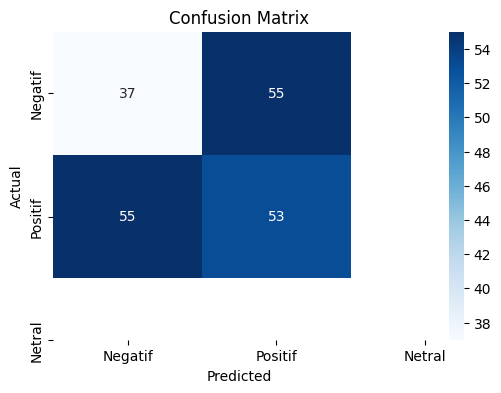

In [213]:
cm = confusion_matrix(Y_test, Y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

RUC CURVE AND AOV

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


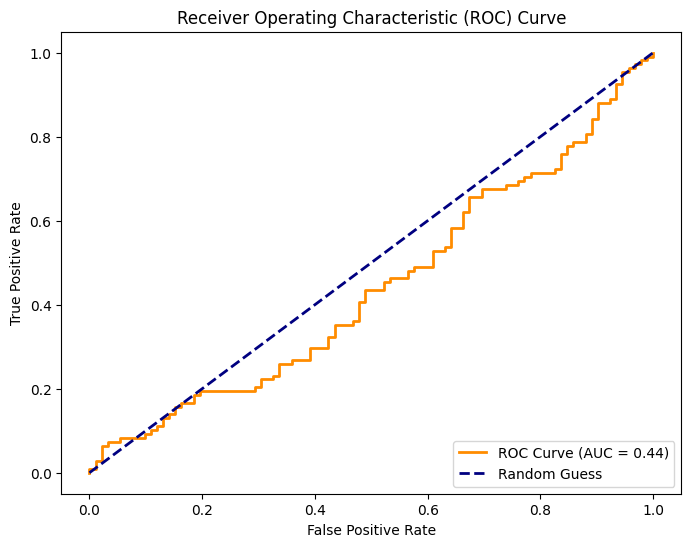

In [214]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure Y_pred contains probabilities
Y_pred_prob = model.predict(X_test)  # Predict probabilities

# If it's binary classification, flatten the predictions
if Y_pred_prob.ndim > 1:
    Y_pred_prob = Y_pred_prob[:, 0]  # Use probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

VISUALISASI HISTORY TRAINING

In [215]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

PLOT LOSS

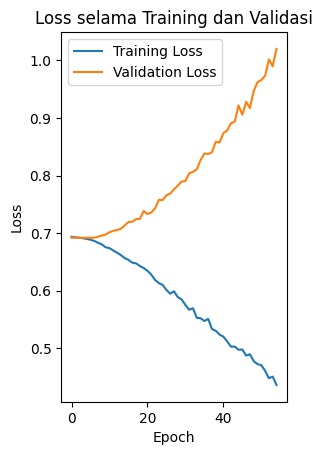

In [216]:
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss selama Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

PLOT AKURASI

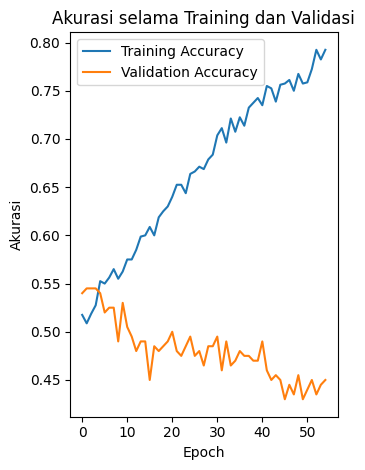

In [217]:
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi selama Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

In [218]:
# Classification report for training data
print("\nClassification Report (Training Data):")
print(classification_report(Y_train, Y_train_pred_class))

# Classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(Y_test, Y_test_pred_class))


Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       392
           1       0.80      0.85      0.82       408

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        92
           1       0.49      0.49      0.49       108

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

